# **Used Car Price Prediction Using Neural Networks**

## **Importing the Necessary Libraries**

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
import warnings 

warnings.filterwarnings("ignore")
print("Importation Complete")

2024-06-07 14:31:39.024662: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 14:31:40.075609: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 14:31:42.214902: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 14:31:45.352394: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Importation Complete


## **Data Importation and Preprocessing**

In this section, I will be importing the dataset, performing data exploration, checking for missing values nad wrong column data types and correcting them. 

In [3]:
#importing the given dataset
df_train = pd.read_csv("/workspaces/KaggleX-Skills-Assessment-Challenge/train.csv") #training dataset
df_test = pd.read_csv("/workspaces/KaggleX-Skills-Assessment-Challenge/test.csv")  #test dataset

In [4]:
#checking the first five rows of our training dataset
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [5]:
#getting the firs five rows of our test dataset
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [6]:
#getting the shape of our training data
df_train.shape

(54273, 13)

In [7]:
#getting the shape of our test data
df_test.shape

(36183, 12)

In [8]:
#getting the information summary on our training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [9]:
#getting the information summary on our test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model         36183 non-null  object
 3   model_year    36183 non-null  int64 
 4   milage        36183 non-null  int64 
 5   fuel_type     36183 non-null  object
 6   engine        36183 non-null  object
 7   transmission  36183 non-null  object
 8   ext_col       36183 non-null  object
 9   int_col       36183 non-null  object
 10  accident      36183 non-null  object
 11  clean_title   36183 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


In [10]:
#checking for missing values
df_train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [11]:
#checking for our test data
df_test.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

**No missing values but for the datatype of the column model_year, It needs to be change to datetime**

In [12]:
df_train["model_year"] = pd.to_datetime(df_train["model_year"], format="%Y") #changing the data type to datetime
df_test["model_year"] = pd.to_datetime(df_test["model_year"], format = "%Y")

In [13]:
df_train["model_year"].dtype

dtype('<M8[ns]')

In [14]:
#getting the descriptive summary of our training dataset
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
id,54273.0,27136.0,0.0,13568.0,27136.0,40704.0,54272.0,15667.409917
model_year,54273,2015-02-03 17:09:35.689569280,1974-01-01 00:00:00,2012-01-01 00:00:00,2016-01-01 00:00:00,2019-01-01 00:00:00,2024-01-01 00:00:00,NaN
milage,54273.0,72746.175667,100.0,32268.0,66107.0,102000.0,405000.0,50469.490448
price,54273.0,39218.443333,2000.0,15500.0,28000.0,45000.0,2954083.0,72826.335535


**The standard deviation for our target variable price is far above the mean which means that there is high variability in the price of the used cars**

In [15]:
#checking for the unique values in our training dataset
df_train.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [16]:
df_test.nunique()

id              36183
brand              53
model            1791
model_year         34
milage           2973
fuel_type           7
engine           1038
transmission       44
ext_col           230
int_col           111
accident            2
clean_title         1
dtype: int64

From the above we can see the number of unique values in each columns. Looking closely at the following categorical columns: `model_year,brand, fuel_type, transmission and accident` we can observe that the distribution will be easier to visualize.

In [17]:
#splitting our dataset into numerical and categorical columns
num = df_train.select_dtypes(include = "number").columns.tolist()
cat = df_train.select_dtypes(include = "object").columns.tolist()

In [18]:
print("These are the numerical columns: ", num)
print("These are the categorical columns: ", cat)

These are the numerical columns:  ['id', 'milage', 'price']
These are the categorical columns:  ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [19]:
#checking the skewness of our numerical columns
for column in num:
    skew = df_train[column].skew()
    print(f"The skewness of {column} is: ", skew)

The skewness of id is:  0.0
The skewness of milage is:  0.8563662187718417
The skewness of price is:  23.62897359328672


When it comes to skewness using the pandas function `skew()`, there is a yardstick to follow:

* If the value of skewness is 0 or very close to zero then it is a normal distribution
* If the value of skewness is positive then it is skewed to the right
* If the value of skewness is negative then it is skewed to the left.

Using the above yardstick, our Milage and Price columns are both right skewed, the Vehicle modely year column is left skewed.

## **Data Visualization**

### **Univariate Analysis**

In this section, we will be visualizing the distribution of single variables (Columns) in our dataset.

In [20]:
# #visualizing the model year column

# plt.figure(figsize=(20,9)) # Set the width and height of the figure
# year = df_train["model_year"].loc[:19]
# #bar chart showing the sale for each category 
# sns.countplot(fuel["fuel_type"], palette="viridis")
# #title
# plt.title("Manufacturing Year of Vehicles")
# plt.xticks(rotation=90)
# #add labels
# plt.ylabel("Number of Vehicles")
# plt.xlabel("Year");

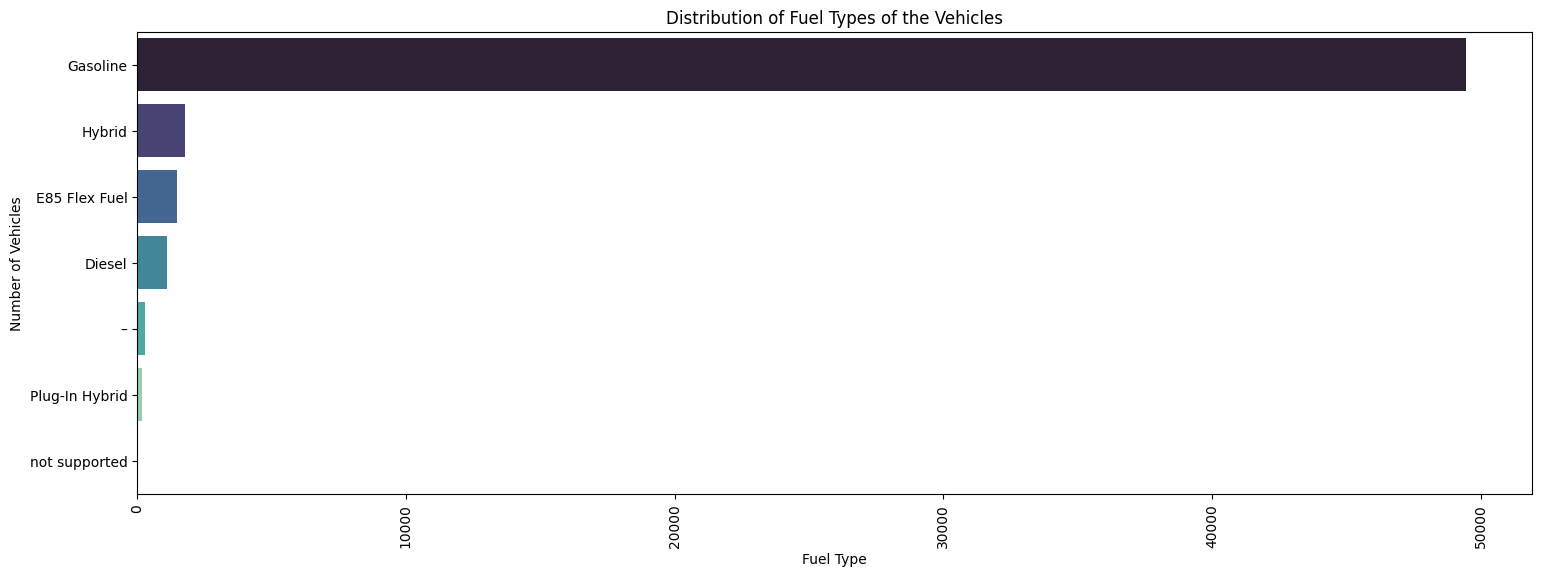

In [21]:
#visualizing fuel type of the used cars
plt.figure(figsize = (18,6))
palette = sns.color_palette("mako")
sns.countplot(df_train["fuel_type"], palette = palette)
plt.xlabel("Fuel Type")
plt.xticks(rotation = 90)
plt.ylabel("Number of Vehicles")
plt.title("Distribution of Fuel Types of the Vehicles")
plt.show();

**Inference:** The most used fuel type is Gasoline. Looking closely we can see that one fuel type doesn''t have a label and is represented with the "-" sign. 

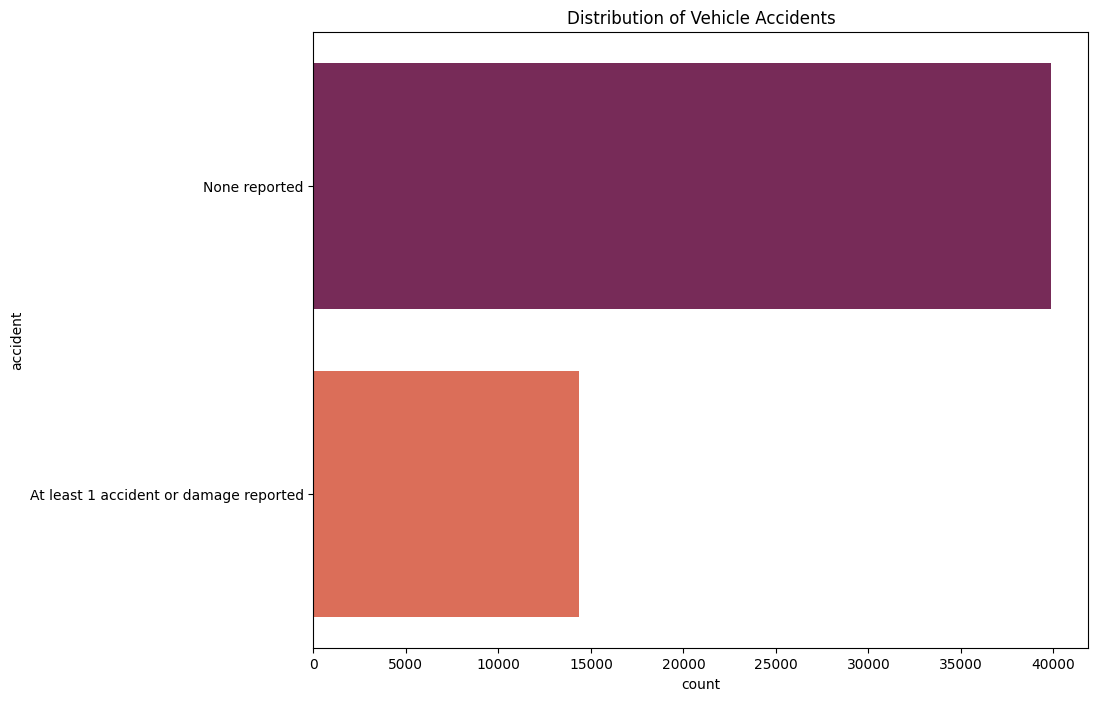

In [22]:
#visualing the distribution of accident column
plt.figure(figsize = (10,8))
sns.countplot(df_train["accident"], palette = "rocket")
plt.title("Distribution of Vehicle Accidents")
plt.show();

**Inference:** Most of the vehicles have had no accidents

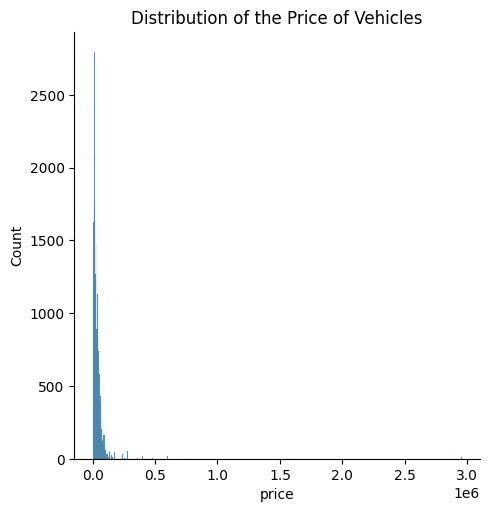

In [23]:
#visualizing the distribution of our target variable
sns.displot(df_train, x = "price")
plt.title("Distribution of the Price of Vehicles");

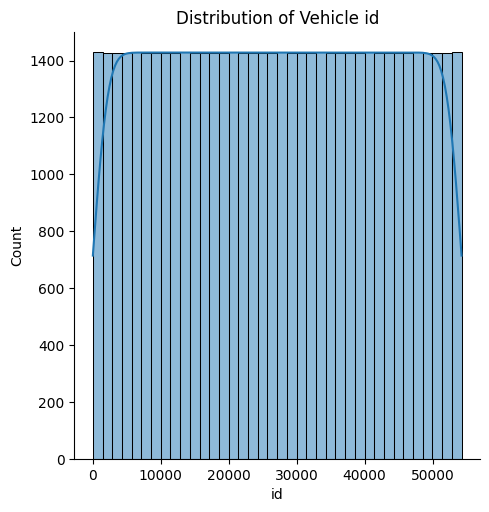

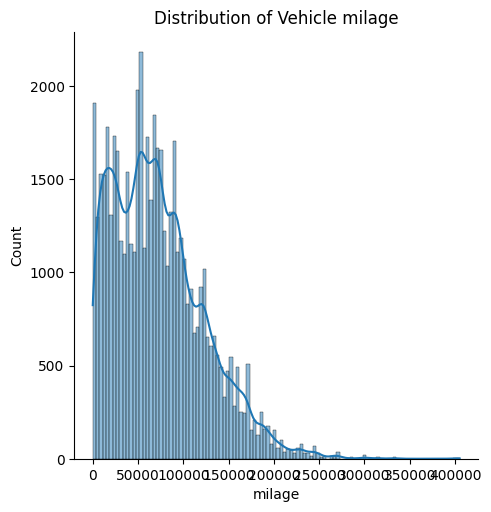

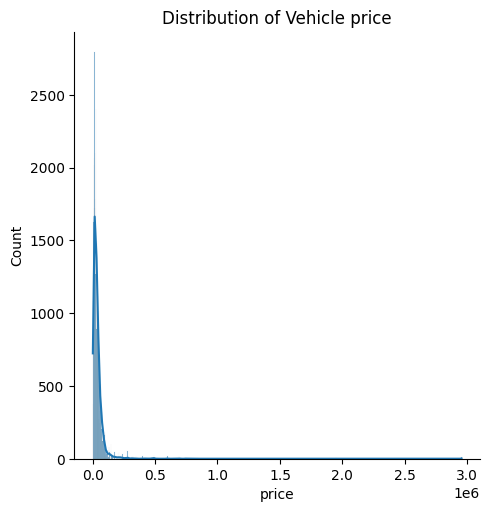

In [24]:
#visualizing all the numerical columns in our dataset
for column in num:
    sns.displot(df_train[column], kde = True)
    plt.title(f"Distribution of Vehicle {column}")

### **Bivariate Analysis**

This stage is for visualizing the relationship between two variables.

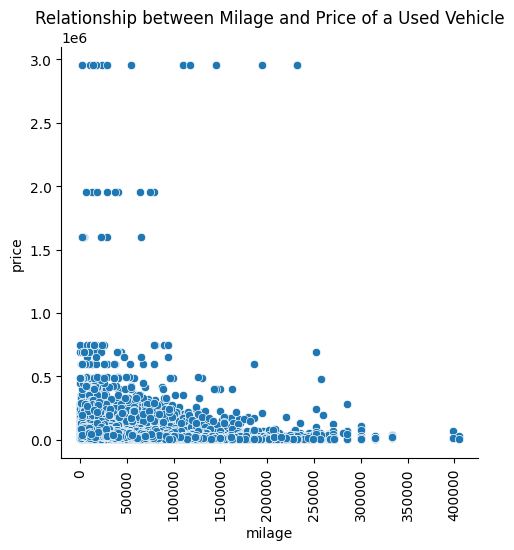

In [25]:
sns.relplot(data = df_train, x = "milage", y = "price")
plt.xticks(rotation = 90)
plt.title("Relationship between Milage and Price of a Used Vehicle");

### **Multivariate Analysis**

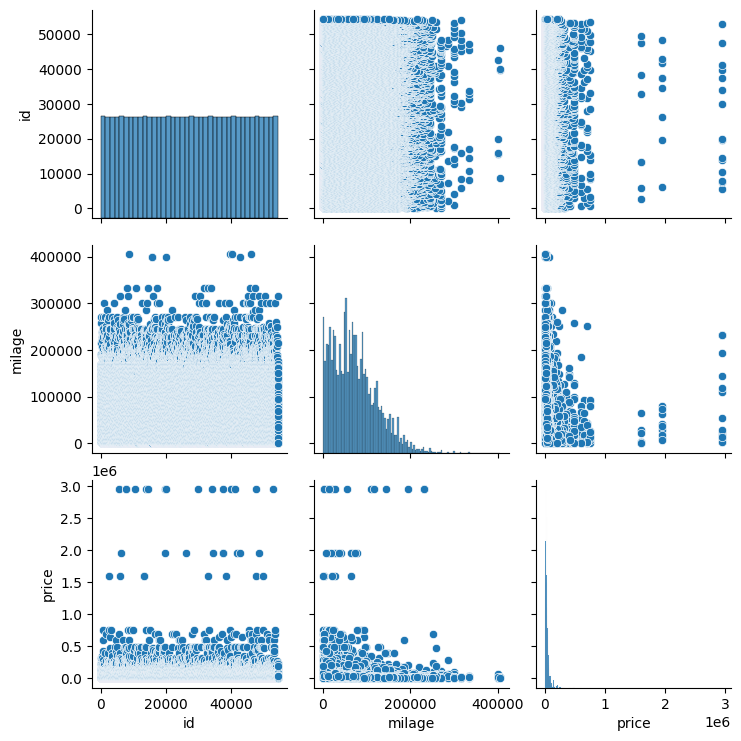

In [43]:
sns.pairplot(df_train);